In [ ]:
import pandas as pd
import os
import json
from sklearn.metrics import cohen_kappa_score

In [4]:
pip install pyreadstat


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [55]:
all_hm_df = pd.read_spss('all_human_coder.sav')
print(all_hm_df.head())

                                 id  Tech  CurrentNegative  PastNegative  \
0  0CD5A01591584DE1940F418669198AEB   1.0              0.5          6.50   
1                          1.20E+49   1.0              1.0          3.50   
2                             10258   1.0             -1.0          5.00   
3                             10408   1.0              0.5          4.00   
4                             11293   1.5              0.5          3.75   

   Commual  Engage  Defens  Question  PespTak  Simi  VaxImp  BoostImp  \
0      6.0     7.0     1.0       0.5      0.5   1.0     2.5       3.5   
1      5.0     4.0     2.0       0.0      1.0   1.0     5.0       2.5   
2      4.0     6.0     1.0       0.0      0.5   2.5     7.0       6.0   
3      3.0     6.5     1.0       1.0      0.0   0.0     7.0       6.5   
4      7.0     7.0     1.0       5.5      3.5   1.5     7.0       6.5   

   CogComp  SelfOther  
0      3.5       3.00  
1      4.5       2.50  
2      7.0       4.00  
3      5

In [2]:
file_path = 'human_coder.sav'
hm_df = pd.read_spss(file_path)

print(hm_df.head())

                                 id  Tech  CurrentNegative  PastNegative  \
0  0CD5A01591584DE1940F418669198AEB   1.0              0.5          6.50   
1                          1.20E+49   1.0              1.0          3.50   
2                             10258   1.0             -1.0          5.00   
3                             10408   1.0              0.5          4.00   
4                             11293   1.5              0.5          3.75   

   Commual  Engage  Defens  Question  PespTak  Simi  VaxImp  BoostImp  \
0      6.0     7.0     1.0       0.5      0.5   1.0     2.5       3.5   
1      5.0     4.0     2.0       0.0      1.0   1.0     5.0       2.5   
2      4.0     6.0     1.0       0.0      0.5   2.5     7.0       6.0   
3      3.0     6.5     1.0       1.0      0.0   0.0     7.0       6.5   
4      7.0     7.0     1.0       5.5      3.5   1.5     7.0       6.5   

   CogComp  SelfOther  
0      3.5       3.00  
1      4.5       2.50  
2      7.0       4.00  
3      5

In [3]:
ranked_pt_df = hm_df.sort_values(by='PespTak', ascending=False)
print(ranked_pt_df.head())  # Display top rows for verification

                                   id  Tech  CurrentNegative  PastNegative  \
4                               11293   1.5              0.5          3.75   
9                               13717   1.0              0.0          7.00   
231  68CDB46365634548A07C5D65711A65B3   1.0             -1.0          2.50   
56                              21103   1.0              1.5          3.50   
90                              24307   1.0              0.0          0.50   

     Commual  Engage  Defens  Question  PespTak  Simi  VaxImp  BoostImp  \
4        7.0     7.0     1.0       5.5      3.5   1.5     7.0       6.5   
9        7.0     7.0     1.0       8.5      3.5   0.0     7.0       7.0   
231      6.0     7.0     1.0       3.5      3.0   0.0     4.5       3.5   
56       7.0     7.0     1.0       1.5      3.0   1.5     7.0       7.0   
90       7.0     7.0     1.0       1.0      2.5   6.0     7.0       7.0   

     CogComp  SelfOther  
4        6.5       5.75  
9        6.5       6.00  
23

In [4]:
unique_ids = hm_df['id'].unique()
print(unique_ids)

['0CD5A01591584DE1940F418669198AEB' '1.20E+49' '10258' '10408' '11293'
 '11542' '13132' '13258' '13306' '13717' '13867' '14044' '15256' '15418'
 '15439' '15442' '15472' '15502' '15523' '15547' '15754' '15817' '15823'
 '15907' '15937' '16114' '16306' '16948' '17668' '17767' '17878'
 '180F3F79E0514EA8A0A0D2FA682C4294' '18268' '18274' '18277' '18670'
 '19012' '19324' '19396' '19423' '19993' '19999' '20005' '20041' '20047'
 '20269' '20344' '20551' '20689' '20809' '20908' '20914' '20950' '20971'
 '21001' '21007' '21103' '21184' '21193' '21277' '21316' '21337' '21364'
 '21370' '21436' '21448' '21646' '21652' '21724' '21826' '21832' '21850'
 '22042' '22054' '22654' '22861' '22876' '22879' '22927' '23311' '23419'
 '23461' '23719' '23767' '23842' '23863' '23887' '23995' '24268' '24304'
 '24307' '24394' '24424' '24460' '24676' '24811' '24919'
 '24BC3A44EAB247DD8A64EE8D7C02D0E5' '26629' '27220' '27490' '27514'
 '27589' '30259' '3046' '3049' '3082' '3166' '3229' '3283' '3307' '3310'
 '3322' '33265

In [4]:
# Create a copy of hm_df
hm_df_truncated = hm_df.copy()

# Truncate the 'id' column to preserve only the first 5 characters for IDs with length > 5
hm_df_truncated['id'] = hm_df_truncated['id'].apply(lambda x: x[:5] if len(x) > 5 else x)

print(hm_df_truncated.head())

      id  Tech  CurrentNegative  PastNegative  Commual  Engage  Defens  \
0  0CD5A   1.0              0.5          6.50      6.0     7.0     1.0   
1  1.20E   1.0              1.0          3.50      5.0     4.0     2.0   
2  10258   1.0             -1.0          5.00      4.0     6.0     1.0   
3  10408   1.0              0.5          4.00      3.0     6.5     1.0   
4  11293   1.5              0.5          3.75      7.0     7.0     1.0   

   Question  PespTak  Simi  VaxImp  BoostImp  CogComp  SelfOther  
0       0.5      0.5   1.0     2.5       3.5      3.5       3.00  
1       0.0      1.0   1.0     5.0       2.5      4.5       2.50  
2       0.0      0.5   2.5     7.0       6.0      7.0       4.00  
3       1.0      0.0   0.0     7.0       6.5      5.0       5.00  
4       5.5      3.5   1.5     7.0       6.5      6.5       5.75  


In [5]:
len(unique_ids)

256

In [ ]:
import re
# Create a new DataFrame with the same column names as hm_df
ai_vd_df = pd.DataFrame(columns=hm_df.columns)

# Path to the directory containing subfolders with JSON files
base_path = "/Users/eveyhuang/Documents/NICO/gemini_code/outputs/NEW_KSM_COVID"

# Iterate through each subfolder and JSON file
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".json"):
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                try:
                    data = json.load(f)
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from file {file_path}: {e}")
                new_row = []
                new_id = file[:5].replace('_', '').replace('.','')  
                if new_id == 'ATTN':
                    print(f"Skipping file {file} with ID {new_id} as it is not valid.")
                    continue
                new_row.append(new_id)

                all_keys = data.keys()
                for key in all_keys:
                    value = data[key]
                    annotation = value
                    if key in ['questions', 'perspective_statements', 'similarity_statements']:
                        annotation = len(value)
                    elif key == 'Notes':
                        annotation = value
                    elif type(value) is list and len(value) > 0:
                       # If the value is a list, take the first element
                        annotation = value[0]
                        if isinstance(annotation, str) and len(annotation) > 1:
                            annotation = [int(x) for x in re.findall(r'\d+', annotation)][0]
                    new_row.append(annotation)
                
                # Append the data as a new row in the DataFrame
                ai_vd_df.loc[len(ai_vd_df)] = new_row

print(ai_vd_df.head())


Error decoding JSON from file /Users/eveyhuang/Documents/NICO/gemini_code/outputs/NEW_KSM_COVID/output_21337/21337/ATTN_21337.json: Expecting ',' delimiter: line 29 column 6 (char 1134)
Skipping file ATTN_21337.json with ID ATTN as it is not valid.
      id Tech CurrentNegative PastNegative Commual Engage Defens  Question  \
0  21448    1               2            3       4      5      1         2   
1  15817    1               2            3       4      5      2         2   
2  20551    1               2            3       5      6      1         5   
3  23311    2               2            3       4      5      1         1   
4  21826    1               1            3       5      6      1         3   

   PespTak  Simi VaxImp BoostImp CogComp  \
0        0     0      1        1       4   
1        0     0      3        3       4   
2        0     0      1        1       5   
3        0     0      4        1       4   
4        0     0      1        1       4   

                 

In [17]:
ai_vd_df = ai_vd_df.rename(columns={'SelfOther': 'Notes'})

In [18]:
print(ai_vd_df['id'].unique())

['21448' '15817' '20551' '23311' '21826' 'B4C98' '22654' '23719' '180F3'
 '8781F' '12E48' '5545' '40084' '4858' '24307' '3283' '4294' '5341'
 '35875' '20908' '42772' '44287' '40627' '43069' '4039' '086E6' '27514'
 '5749' '13717' '44626' '41965' '39043' '35689' '43582' '33265' '15754'
 '15937' '37855' '19993' '18277' '43927' '16114' '4588' '20041' '21193'
 '3553' '6DF63' 'A7D0D' '9631' '24424' '21364' '4516' '20689' '43921'
 '4378' '40561' '50707' '24811' '23461' '41449' '22927' '38647' '15907'
 '44560' '21103' '18670' '41041' '43975' '20047' '15502' '23863' '23419'
 '39184' '10258' '44188' '43702' '3310' '21724' '33823' '4132' 'B7D21'
 '30259' '43564' '78CFD' '9421' '24268' '6451' '4102' '10408' '20269'
 '21370' '17878' '11542' 'E75AA' '42223' '43792' '42472' '39928' '22876'
 '21436' '39637' '23995' '15256' '23767' '17767' '21001' '3B490' '15439'
 '35233' '37564' '22042' '5755' '7492' '22879' '11293' '20971' '5338'
 '21850' '21007' 'GMT20' 'AEF1C' '21832' '20914' '20950' '4456' '42712'

In [20]:

# Ensure both DataFrames have the same IDs and exclude "Notes" and "SelfOther" columns
columns_to_exclude = ['Notes', 'SelfOther']
hm_df_filtered = hm_df_truncated.drop(columns=columns_to_exclude, errors='ignore')
ai_vd_df_filtered = ai_vd_df.drop(columns=columns_to_exclude, errors='ignore')

# Merge the filtered DataFrames on 'id'
merged_df = pd.merge(hm_df_filtered, ai_vd_df_filtered, on='id', suffixes=('_hm', '_aivd'))
columns_to_cast = [col for col in merged_df.columns if col != 'id']
merged_df[columns_to_cast] = merged_df[columns_to_cast].astype(float)
print(merged_df['id'].unique())


['0CD5A' '10258' '10408' '11293' '11542' '13132' '13258' '13306' '13717'
 '13867' '14044' '15256' '15418' '15439' '15442' '15472' '15502' '15523'
 '15547' '15754' '15817' '15823' '15907' '15937' '16114' '16306' '16948'
 '17668' '17767' '17878' '180F3' '18268' '18274' '18277' '18670' '19012'
 '19324' '19396' '19423' '19993' '19999' '20005' '20041' '20047' '20269'
 '20344' '20551' '20689' '20809' '20908' '20914' '20950' '20971' '21001'
 '21007' '21103' '21184' '21193' '21277' '21316' '21364' '21370' '21436'
 '21448' '21646' '21652' '21724' '21826' '21832' '21850' '22042' '22054'
 '22654' '22861' '22876' '22879' '22927' '23311' '23419' '23461' '23719'
 '23767' '23842' '23863' '23887' '23995' '24268' '24304' '24307' '24394'
 '24424' '24460' '24676' '24811' '24919' '24BC3' '26629' '27220' '27490'
 '27514' '27589' '30259' '3046' '3049' '3082' '3166' '3229' '3283' '3307'
 '3310' '3322' '33265' '3349' '33661' '3370' '33823' '3406' '34345' '3511'
 '35233' '3526' '3535' '3553' '35689' '35875' '3

In [67]:
# Initialize a dictionary to store Cohen's kappa scores for each category
kappa_scores = {}
all_labels = list(range(-1, 8)) 
# Iterate through each category (column) in hm_df excluding 'id'
categories = [col for col in hm_df_filtered.columns if col != 'id']
for category in categories:
    # if f"{category}_hm" in merged_df.columns and f"{category}_new" in merged_df.columns:
    #     # Calculate Cohen's kappa score for the category
    #     kappa = cohen_kappa_score(merged_df[f"{category}_hm"], merged_df[f"{category}_new"])
    #     kappa_scores[category] = kappa
    
    col_hm = f"{category}_hm"
    col_new = f"{category}_new"
    
    if col_hm in merged_df.columns and col_new in merged_df.columns:
        # Drop NaNs
        y_true = merged_df[col_hm].round().astype(int)
        y_pred = merged_df[col_new].round().astype(int)
        kappa = cohen_kappa_score(y_true, y_pred, labels=all_labels, weights='linear')
        kappa_scores[category] = kappa
# Print the Cohen's kappa scores for each category
for category, score in kappa_scores.items():
    print(f"Cohen's kappa for {category}: {score}")

Cohen's kappa for Tech: 0.0
Cohen's kappa for CurrentNegative: 0.07999999999999996
Cohen's kappa for PastNegative: 0.041825095057034245
Cohen's kappa for Commual: 0.022058823529411686
Cohen's kappa for Engage: 0.0
Cohen's kappa for Defens: 0.17204301075268813
Cohen's kappa for Question: 0.25039370078740164
Cohen's kappa for PespTak: 0.0
Cohen's kappa for Simi: 0.12250712250712248
Cohen's kappa for VaxImp: 0.19999999999999996
Cohen's kappa for BoostImp: 0.3870402802101576
Cohen's kappa for CogComp: 0.02506963788300831


In [ ]:
# Initialize a dictionary to store Cohen's kappa scores for each category
simple_agreement_scores = {}
all_labels = list(range(-1, 8)) 
# Iterate through each category (column) in hm_df excluding 'id'
categories = [col for col in hm_df_filtered.columns if col != 'id']
for category in categories:
    # if f"{category}_hm" in merged_df.columns and f"{category}_new" in merged_df.columns:
    #     # Calculate Cohen's kappa score for the category
    #     kappa = cohen_kappa_score(merged_df[f"{category}_hm"], merged_df[f"{category}_new"])
    #     kappa_scores[category] = kappa
    
    col_hm = f"{category}_hm"
    col_new = f"{category}_new"
    
    if col_hm in merged_df.columns and col_new in merged_df.columns:
        # Drop NaNs
        y_true = merged_df[col_hm].round().astype(int)
        y_pred = merged_df[col_new].round().astype(int)
        valid_pairs = [(a, b) for a, b in zip(y_true, y_pred) if a != -1 and b != -1]
        # Count total valid pairs
        n_total = len(valid_pairs)

        # Count agreements
        n_agree = sum(a == b for a, b in valid_pairs)

        # Calculate percent agreement
        percent_agreement = n_agree / n_total if n_total > 0 else float('nan')

        simple_agreement_scores[category] = percent_agreement
# Print the Cohen's kappa scores for each category
for category, score in simple_agreement_scores.items():
    print(f"Simple agreement score for {category}: {score}")



Simple agreement score for Tech: 0.9642857142857143
Simple agreement score for CurrentNegative: 0.19047619047619047
Simple agreement score for PastNegative: 0.07142857142857142
Simple agreement score for Commual: 0.17857142857142858
Simple agreement score for Engage: 0.07142857142857142
Simple agreement score for Defens: 0.6071428571428571
Simple agreement score for Question: 0.21428571428571427
Simple agreement score for PespTak: 0.5
Simple agreement score for Simi: 0.4642857142857143
Simple agreement score for VaxImp: 0.38461538461538464
Simple agreement score for BoostImp: 0.4166666666666667
Simple agreement score for CogComp: 0.32142857142857145
Percent agreement: 32.14%


In [ ]:
pip install pingouin

In [23]:
# Initialize a dictionary to store Cohen's kappa scores for each category
import pingouin as pg

icc_scores = {}
all_labels = list(range(-1, 8)) 
# Iterate through each category (column) in hm_df excluding 'id'
categories = [col for col in hm_df_filtered.columns if col != 'id']
for category in categories:
    # if f"{category}_hm" in merged_df.columns and f"{category}_new" in merged_df.columns:
    #     # Calculate Cohen's kappa score for the category
    #     kappa = cohen_kappa_score(merged_df[f"{category}_hm"], merged_df[f"{category}_new"])
    #     kappa_scores[category] = kappa
    
    col_hm = f"{category}_hm"
    col_new = f"{category}_aivd"
    
    if col_hm in merged_df.columns and col_new in merged_df.columns:
        # Drop NaNs
        coder_1 = merged_df[col_hm]
        coder_2 = merged_df[col_new]
        df = pd.DataFrame({'coder1': coder_1, 'coder2': coder_2})
        
        # Exclude -1s
        df = df[(df['coder1'] != -1) & (df['coder2'] != -1)].dropna()
        print(f"Processing category: {category}" + f" with {len(coder_1)} entries")
        # Reshape for pingouin
        df_long = df.melt(var_name='rater', value_name='score', ignore_index=False).reset_index()
        icc = pg.intraclass_corr(data=df_long, targets='index', raters='rater', ratings='score')
       
        icc_scores[category] = icc['ICC'].values[1] if not icc.empty else float('nan')

# Print the Cohen's kappa scores for each category
for category, score in icc_scores.items():
    print(f"ICC score for {category}: {score}")



Processing category: Tech with 249 entries
Processing category: CurrentNegative with 249 entries
Processing category: PastNegative with 249 entries
Processing category: Commual with 249 entries
Processing category: Engage with 249 entries
Processing category: Defens with 249 entries
Processing category: Question with 249 entries
Processing category: PespTak with 249 entries
Processing category: Simi with 249 entries
Processing category: VaxImp with 249 entries
Processing category: BoostImp with 249 entries
Processing category: CogComp with 249 entries
ICC score for Tech: 0.17212182291547398
ICC score for CurrentNegative: 0.23625101429248554
ICC score for PastNegative: 0.04206306375761313
ICC score for Commual: 0.15735956830239778
ICC score for Engage: 0.0961697126283191
ICC score for Defens: 0.17544776336032977
ICC score for Question: 0.24076840426725094
ICC score for PespTak: -0.005136106831022067
ICC score for Simi: 0.16602375076838097
ICC score for VaxImp: 0.20744362803556818
ICC sc

### AI Text Coding

In [24]:
file_path = '/Users/eveyhuang/Documents/NICO/gemini_code/outputs/TEXT_KSM_COVID/output_0CD5A/0CD5A_Transcription.vtt/ATTN_0CD5A_Transcription.vtt.json'
file='ATTN_0CD5A_Transcription.vtt.json'
root= os.path.dirname(file_path)
# Remove trailing ```
with open(file_path, "r") as f:
    lines = f.readlines()
    # Remove lines that are just ```
    lines = [line for line in lines if line.strip() != "```"]
    # Write cleaned content back
    with open(file_path, "w") as f:
        f.writelines(lines)
    # Rename file if it starts with ATTN_
    if file.startswith("ATTN_"):
        new_file = file.replace("ATTN_", "", 1)
        new_path = os.path.join(root, new_file)
        os.rename(file_path, new_path)
        print(f"Renamed: {file_path} -> {new_path}")

Renamed: /Users/eveyhuang/Documents/NICO/gemini_code/outputs/TEXT_KSM_COVID/output_0CD5A/0CD5A_Transcription.vtt/ATTN_0CD5A_Transcription.vtt.json -> /Users/eveyhuang/Documents/NICO/gemini_code/outputs/TEXT_KSM_COVID/output_0CD5A/0CD5A_Transcription.vtt/0CD5A_Transcription.vtt.json


In [38]:
### try analysis of vtt transcripts
# Create a new DataFrame with the same column names as hm_df
vtt_df = pd.DataFrame(columns=hm_df.columns)

# Path to the directory containing subfolders with JSON files
base_path = "/Users/eveyhuang/Documents/NICO/gemini_code/outputs/TEXT_KSM_COVID"

# Iterate through each subfolder and JSON file
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".json"):
            file_path = os.path.join(root, file)
            if file.startswith('ATTN_'):
                with open(file_path, "r") as f:
                    lines = f.readlines()
                    # Remove lines that are just ```
                    lines = [line for line in lines if line.strip() != "```"]
                    # Write cleaned content back
                    with open(file_path, "w") as f:
                        f.writelines(lines)
                    # Rename file if it starts with ATTN_
                    if file.startswith("ATTN_"):
                        new_file = file.replace("ATTN_", "", 1)
                        new_path = os.path.join(root, new_file)
                        
                        os.rename(file_path, new_path)
                        file_path = new_path  # Update file_path to the new path
                        print(f"Renamed: {file_path} -> {new_path}")
            
            with open(file_path, 'r') as f:
                try:
                    data = json.load(f)
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from file {file_path}: {e}")
                new_row = []
                # Extract the first 5 characters of the file name as "id"
                new_id = file[:5].replace('_', '').replace('.','') 
                new_row.append(new_id)
                all_keys = data.keys()
                for key in all_keys:
                    value = data[key]
                    annotation = value
                    if key in ['questions', 'perspective_statements', 'similarity_statements']:
                        annotation = len(value)
                    elif key in ['Notes', 'general_notes']:
                        annotation = value
                    elif type(value) is list and len(value) > 0:
                       # If the value is a list, take the first element
                        try:
                            annotation = value[0]
                            if isinstance(annotation, str) and len(annotation) > 1:
                                annotation = [int(x) for x in re.findall(r'\d+', annotation)][0]
                        except IndexError as e:
                            print(f"Error processing value for key '{key}' in file {file_path}: {e}")
                    new_row.append(annotation)
                # print(new_row)
                # Append the data as a new row in the DataFrame
                vtt_df.loc[len(vtt_df)] = new_row

print(vtt_df)

        id Tech CurrentNegative PastNegative Commual Engage Defens  Question  \
0    21448    1               2            3       5      6      1        12   
1    15817    1               3            3       4      5      3         9   
2    20551    1               2            3       6      6      1        15   
3    23311    2               2            4       5      6      1         9   
4    21826    1               2            4       5      6      1         6   
..     ...  ...             ...          ...     ...    ...    ...       ...   
251  A3BE4    1               2            3       5      5      2         6   
252  39409    1               2            3       5      6      1        32   
253  20344    1               3            3       5      6      1         6   
254  36817    1               2            3       5      6      1         8   
255  26629    1               2            3       5      6      1        10   

     PespTak  Simi VaxImp BoostImp CogC

In [39]:
vtt_df_filtered = vtt_df.drop(columns=columns_to_exclude, errors='ignore')
column_mapping = {col: col + '_aitext' if col != 'id' else col for col in vtt_df_filtered.columns}
vtt_df_filtered = vtt_df_filtered.rename(columns=column_mapping)
print(vtt_df_filtered.head())

      id Tech_aitext CurrentNegative_aitext PastNegative_aitext  \
0  21448           1                      2                   3   
1  15817           1                      3                   3   
2  20551           1                      2                   3   
3  23311           2                      2                   4   
4  21826           1                      2                   4   

  Commual_aitext Engage_aitext Defens_aitext  Question_aitext  PespTak_aitext  \
0              5             6             1               12               3   
1              4             5             3                9               0   
2              6             6             1               15               0   
3              5             6             1                9               0   
4              5             6             1                6               0   

   Simi_aitext VaxImp_aitext BoostImp_aitext CogComp_aitext  
0            1             7               7    

In [40]:
print(vtt_df_filtered['id'].unique())

['21448' '15817' '20551' '23311' '21826' 'B4C98' '22654' '23719' '180F3'
 '8781F' '12E48' '5545' '40084' '4858' '24307' '3283' '4294' '5341'
 '35875' '20908' '42772' '44287' '40627' '43069' '4039' '086E6' '27514'
 '5749' '13717' '44626' '41965' '39043' '35689' '43582' '33265' '15754'
 '21337' '15937' '37855' '19993' '18277' '43927' '16114' '4588' '20041'
 '21193' '3553' '6DF63' 'A7D0D' '9631' '24424' '21364' '4516' '20689'
 '43921' '4378' '40561' '50707' '24811' '23461' '41449' '22927' '38647'
 '15907' '44560' '21103' '18670' '41041' '43975' '20047' '15502' '23863'
 '23419' '39184' '10258' '44188' '43702' '3310' '21724' '33823' '4132'
 'B7D21' '30259' '43564' '78CFD' '9421' '24268' '6451' '4102' '10408'
 '20269' '21370' '17878' '11542' 'E75AA' '42223' '43792' '42472' '39928'
 '22876' '21436' '39637' '23995' '15256' '23767' '17767' '21001' '3B490'
 '15439' '35233' '37564' '22042' '5755' '7492' '22879' '11293' '20971'
 '5338' '21850' '21007' 'GMT20' 'AEF1C' '21832' '20914' '20950' '4456'

In [41]:
# Merge the filtered DataFrames on 'id'
vtt_merged_df = pd.merge(merged_df, vtt_df_filtered, on='id')
columns_to_cast = [col for col in vtt_merged_df.columns if col != 'id']
vtt_merged_df[columns_to_cast] = vtt_merged_df[columns_to_cast].astype(float)
print(vtt_merged_df.head())

      id  Tech_hm  CurrentNegative_hm  PastNegative_hm  Commual_hm  Engage_hm  \
0  0CD5A      1.0                 0.5             6.50         6.0        7.0   
1  10258      1.0                -1.0             5.00         4.0        6.0   
2  10408      1.0                 0.5             4.00         3.0        6.5   
3  11293      1.5                 0.5             3.75         7.0        7.0   
4  11542      1.5                 2.0             6.00         6.0        7.0   

   Defens_hm  Question_hm  PespTak_hm  Simi_hm  ...  PastNegative_aitext  \
0        1.0          0.5         0.5      1.0  ...                  4.0   
1        1.0          0.0         0.5      2.5  ...                  4.0   
2        1.0          1.0         0.0      0.0  ...                  3.0   
3        1.0          5.5         3.5      1.5  ...                  3.0   
4        1.0          3.0         0.0      3.0  ...                  3.0   

   Commual_aitext  Engage_aitext  Defens_aitext  Questio

In [42]:
print(len(vtt_merged_df['id'].unique()))

247


In [61]:
# For each category, create a new column with the average of _aivd and _aitext columns
for category in [col for col in hm_df_filtered.columns if col != 'id']:
    col_vd = f"{category}_aivd"
    col_txt = f"{category}_aitext"
    avg_col = f"{category}_avg_vd_txt"
    if col_vd in vtt_merged_df.columns and col_txt in vtt_merged_df.columns:
        vtt_merged_df[avg_col] = vtt_merged_df[[col_vd, col_txt]].mean(axis=1)

In [ ]:
import statistics

# Get means, medians, and standard deviations for each category and for human coding, AI coding on videos, AI coding on transcripts
means_hm = {}
means_vd = {}
means_ts = {}
means_avg = {}
median_hm = {}
median_vd = {}
median_ts = {}
median_avg = {}
std_hm = {}
std_vd = {}
std_ts = {}
std_avg = {}

categories = [col for col in hm_df_filtered.columns if col != 'id']

for category in categories:
    col_hm = f"{category}_hm"
    col_vd = f"{category}_aivd"
    col_ts = f"{category}_aitext"
    col_avg = f"{category}_avg_vd_txt"

    if col_hm in vtt_merged_df.columns:
        values_hm = vtt_merged_df[col_hm].dropna().tolist()
        values_vd = vtt_merged_df[col_vd].dropna().tolist()
        values_ts = vtt_merged_df[col_ts].dropna().tolist()
        values_avg = vtt_merged_df[col_avg].dropna().tolist()

        # Calculate mean, median, and standard deviation for human coding
        means_hm[category] = statistics.mean(values_hm)
        median_hm[category] = statistics.median(values_hm)
        std_hm[category] = statistics.stdev(values_hm)

        # Calculate mean, median, and standard deviation for AI coding on videos
        means_vd[category] = statistics.mean(values_vd)
        median_vd[category] = statistics.median(values_vd)
        std_vd[category] = statistics.stdev(values_vd)

        # Calculate mean, median, and standard deviation for AI coding on transcripts
        means_ts[category] = statistics.mean(values_ts)
        median_ts[category] = statistics.median(values_ts)
        std_ts[category] = statistics.stdev(values_ts)

        # Calculate mean, median, and standard deviation for average of AI coding on videos and transcripts
        means_avg[category] = statistics.mean(values_avg)
        median_avg[category] = statistics.median(values_avg)
        std_avg[category] = statistics.stdev(values_avg)


# Create a table to display the means, medians, and standard deviations
means_table = pd.DataFrame({
    'Category': categories,
    'Mean_Human_Coding': [means_hm[cat] for cat in categories],
    'Mean_AI_Video_Coding': [means_vd[cat] for cat in categories],
    'Mean_AI_Transcript_Coding': [means_ts[cat] for cat in categories],
    'Mean_AI_Average': [means_avg[cat] for cat in categories],
    
    'Median_Human_Coding': [median_hm[cat] for cat in categories],
    'Median_AI_Video_Coding': [median_vd[cat] for cat in categories],
    'Median_AI_Transcript_Coding': [median_ts[cat] for cat in categories],
    'Median_AI_Average': [median_avg[cat] for cat in categories],

    'Std_Human_Coding': [std_hm[cat] for cat in categories],
    'Std_AI_Video_Coding': [std_vd[cat] for cat in categories],
    'Std_AI_Transcript_Coding': [std_ts[cat] for cat in categories],
    'Std_AI_Average': [std_avg[cat] for cat in categories]
})
means_table = means_table.round(3)
print(means_table)

           Category  Mean_Human_Coding  Mean_AI_Video_Coding  \
0              Tech              1.323                 1.040   
1   CurrentNegative              1.036                 1.628   
2      PastNegative              4.622                 2.955   
3           Commual              4.716                 4.372   
4            Engage              5.925                 5.352   
5            Defens              1.183                 1.020   
6          Question              1.193                 2.016   
7           PespTak              0.520                 0.004   
8              Simi              1.026                 0.344   
9            VaxImp              5.733                 4.239   
10         BoostImp              4.518                 3.749   
11          CogComp              5.272                 4.138   

    Mean_AI_Transcript_Coding  Mean_AI_Average  Median_Human_Coding  \
0                       1.069            1.055                  1.0   
1                       2

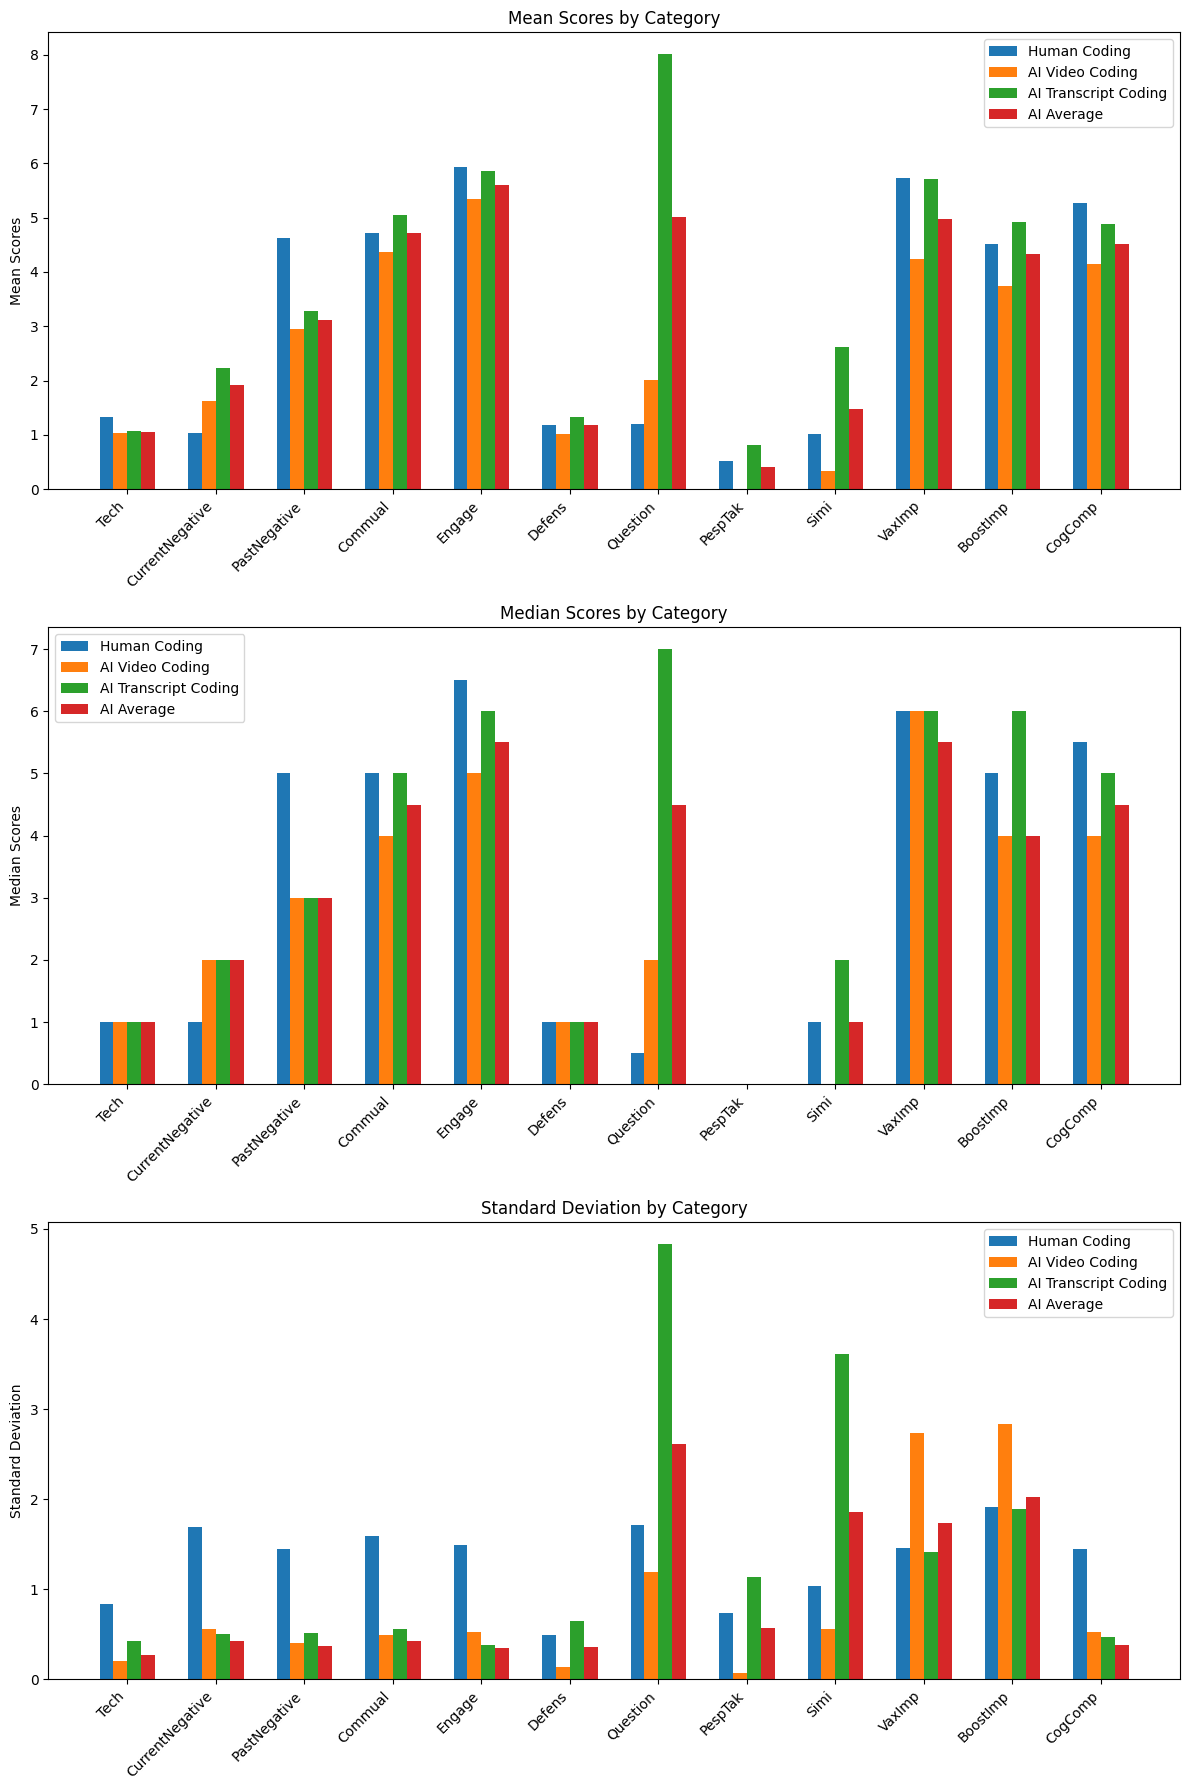

In [70]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

categories = means_table['Category']
n = len(categories)
x = range(n)

bar_width = 0.18  # Make bars thinner
group_gap = 0.15  # Add gap between groups

# Calculate new x positions with extra gap between groups
group_positions = [i * (1 + group_gap) for i in x]

# Plot mean values
axes[0].bar([p for p in group_positions], means_table['Mean_Human_Coding'], width=bar_width, label='Human Coding', align='center')
axes[0].bar([p + bar_width for p in group_positions], means_table['Mean_AI_Video_Coding'], width=bar_width, label='AI Video Coding', align='center')
axes[0].bar([p + 2*bar_width for p in group_positions], means_table['Mean_AI_Transcript_Coding'], width=bar_width, label='AI Transcript Coding', align='center')
axes[0].bar([p + 3*bar_width for p in group_positions], means_table['Mean_AI_Average'], width=bar_width, label='AI Average', align='center')
axes[0].set_xticks([p + 1.5*bar_width for p in group_positions])
axes[0].set_xticklabels(categories, rotation=45, ha='right')
axes[0].set_ylabel('Mean Scores')
axes[0].set_title('Mean Scores by Category')
axes[0].legend()

# Plot median values
axes[1].bar([p for p in group_positions], means_table['Median_Human_Coding'], width=bar_width, label='Human Coding', align='center')
axes[1].bar([p + bar_width for p in group_positions], means_table['Median_AI_Video_Coding'], width=bar_width, label='AI Video Coding', align='center')
axes[1].bar([p + 2*bar_width for p in group_positions], means_table['Median_AI_Transcript_Coding'], width=bar_width, label='AI Transcript Coding', align='center')
axes[1].bar([p + 3*bar_width for p in group_positions], means_table['Median_AI_Average'], width=bar_width, label='AI Average', align='center')
axes[1].set_xticks([p + 1.5*bar_width for p in group_positions])
axes[1].set_xticklabels(categories, rotation=45, ha='right')
axes[1].set_ylabel('Median Scores')
axes[1].set_title('Median Scores by Category')
axes[1].legend()

# Plot standard deviation values
axes[2].bar([p for p in group_positions], means_table['Std_Human_Coding'], width=bar_width, label='Human Coding', align='center')
axes[2].bar([p + bar_width for p in group_positions], means_table['Std_AI_Video_Coding'], width=bar_width, label='AI Video Coding', align='center')
axes[2].bar([p + 2*bar_width for p in group_positions], means_table['Std_AI_Transcript_Coding'], width=bar_width, label='AI Transcript Coding', align='center')
axes[2].bar([p + 3*bar_width for p in group_positions], means_table['Std_AI_Average'], width=bar_width, label='AI Average', align='center')
axes[2].set_xticks([p + 1.5*bar_width for p in group_positions])
axes[2].set_xticklabels(categories, rotation=45, ha='right')
axes[2].set_ylabel('Standard Deviation')
axes[2].set_title('Standard Deviation by Category')
axes[2].legend()

plt.tight_layout()
plt.show()

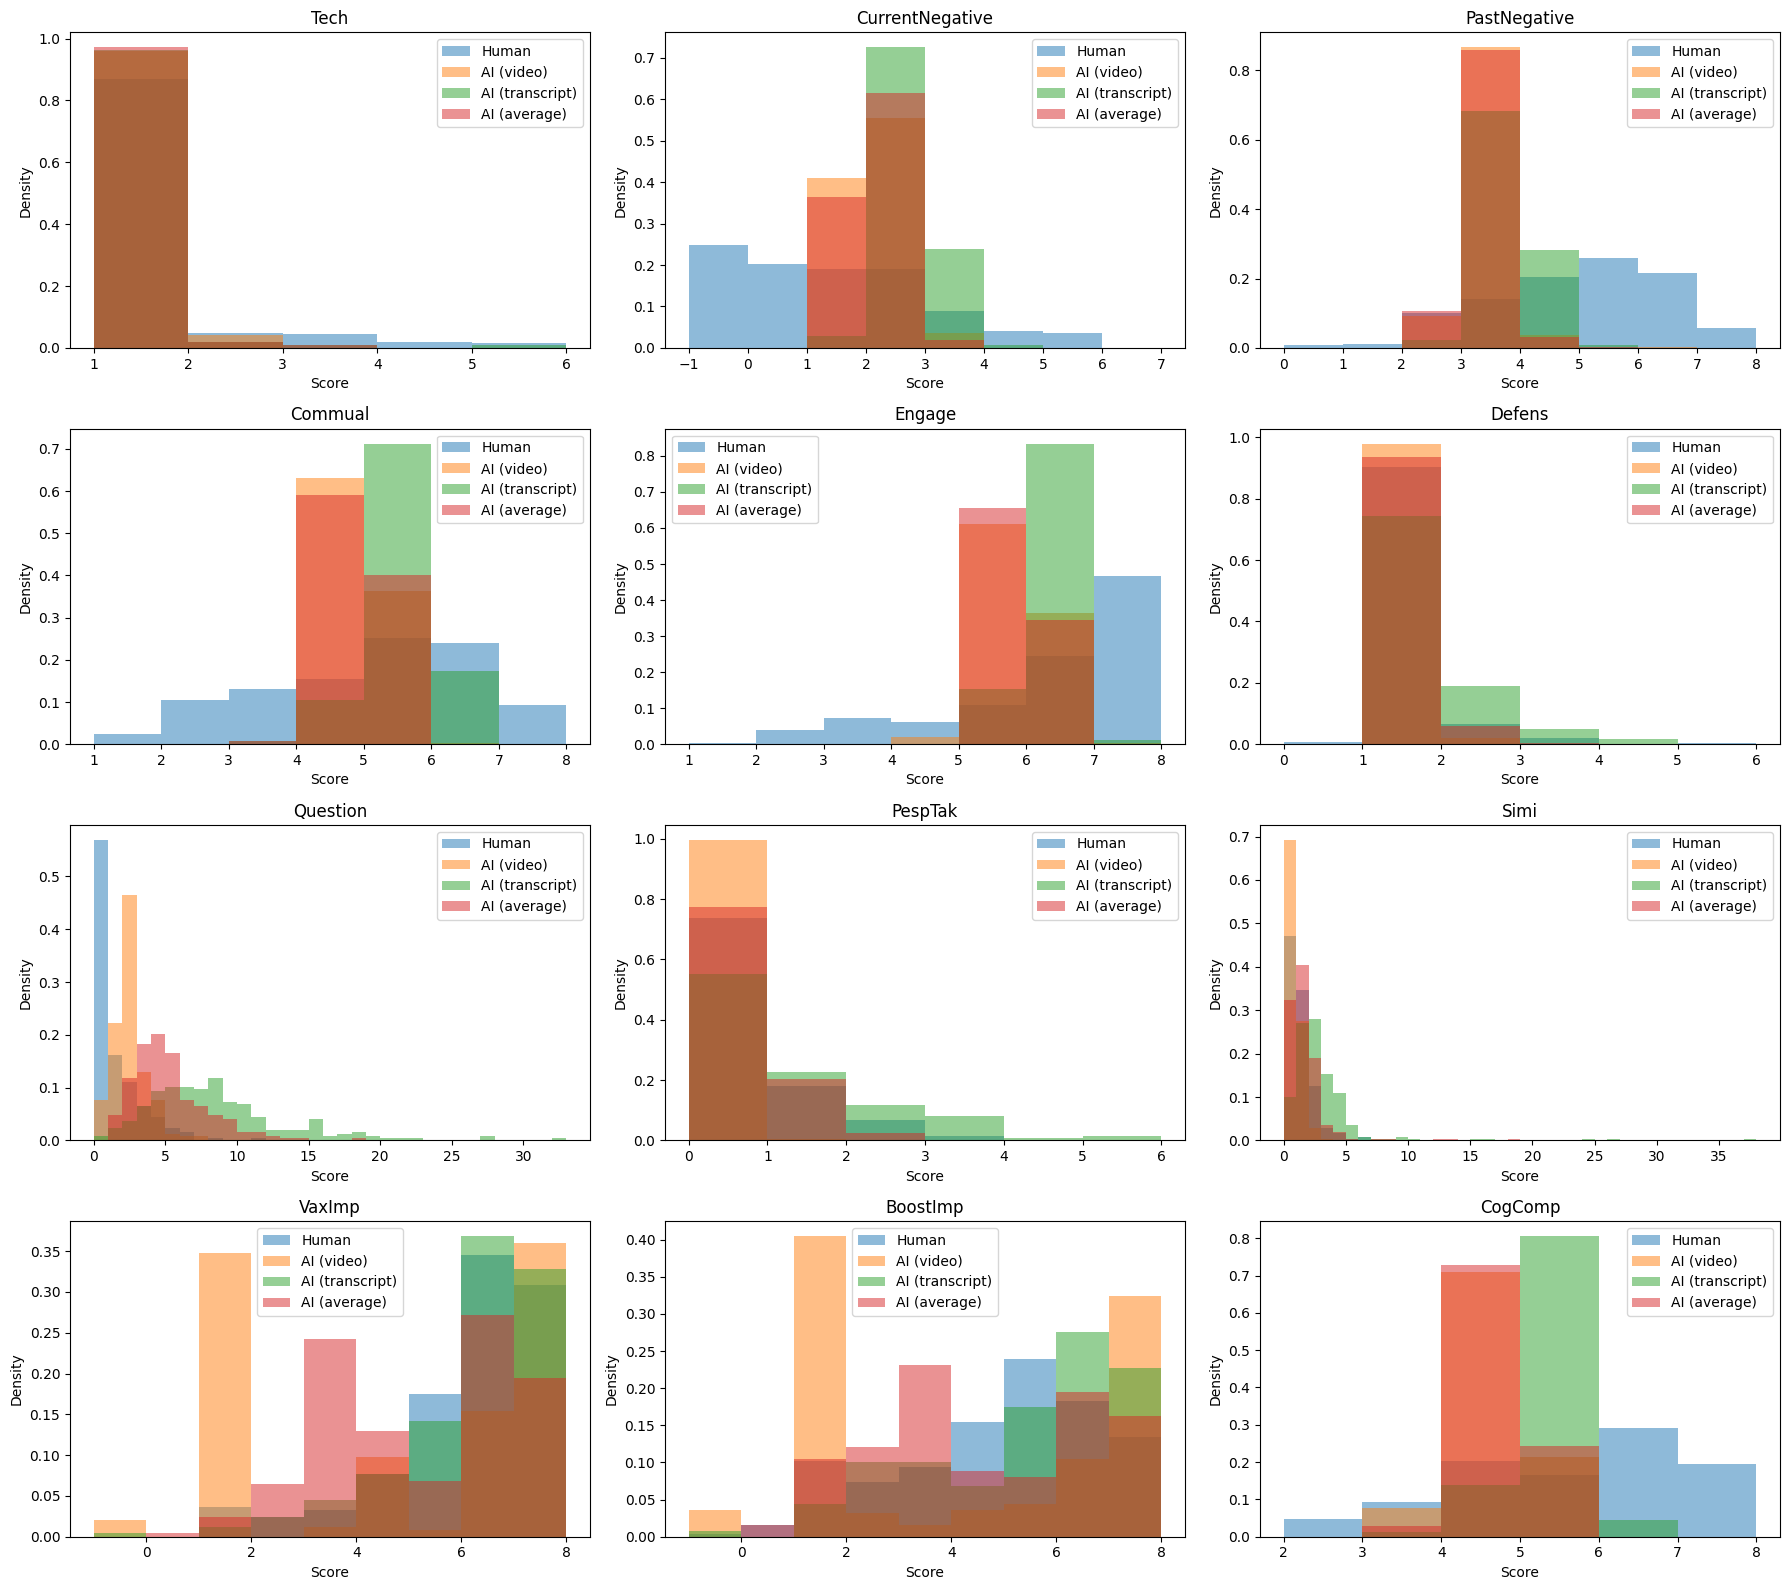

In [72]:
import matplotlib.pyplot as plt

categories = [col for col in hm_df_filtered.columns if col != 'id']
n_categories = len(categories)
n_cols = 3
n_rows = (n_categories + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, category in enumerate(categories):
    col_hm = f"{category}_hm"
    col_vd = f"{category}_aivd"
    col_ts = f"{category}_aitext"
    col_avg = f"{category}_avg_vd_txt"
    
    ax = axes[i]
    # Drop NaNs for each
    data_hm = vtt_merged_df[col_hm].dropna()
    data_vd = vtt_merged_df[col_vd].dropna()
    data_ts = vtt_merged_df[col_ts].dropna()
    data_avg = vtt_merged_df[col_avg].dropna()
    
    bins = sorted(set(data_hm.round().astype(int)).union(
                  set(data_vd.round().astype(int)),
                  set(data_ts.round().astype(int)),
                  set(data_avg.round().astype(int))))
    bins = list(range(min(bins), max(bins)+2))  # +2 to include last edge

    ax.hist(data_hm, bins=bins, alpha=0.5, label='Human', color='tab:blue', density=True)
    ax.hist(data_vd, bins=bins, alpha=0.5, label='AI (video)', color='tab:orange', density=True)
    ax.hist(data_ts, bins=bins, alpha=0.5, label='AI (transcript)', color='tab:green', density=True)
    ax.hist(data_avg, bins=bins, alpha=0.5, label='AI (average)', color='tab:red', density=True)
    ax.set_title(category)
    ax.set_xlabel('Score')
    ax.set_ylabel('Density')
    ax.legend()

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

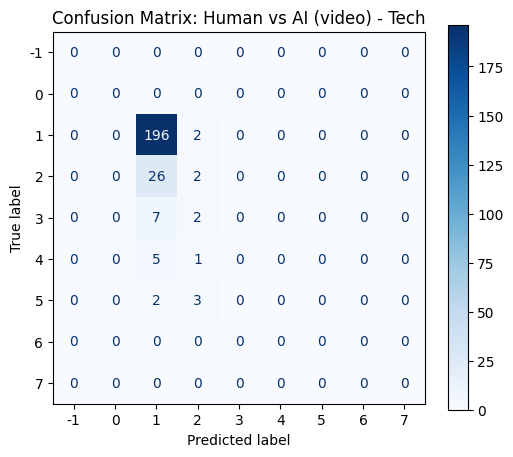

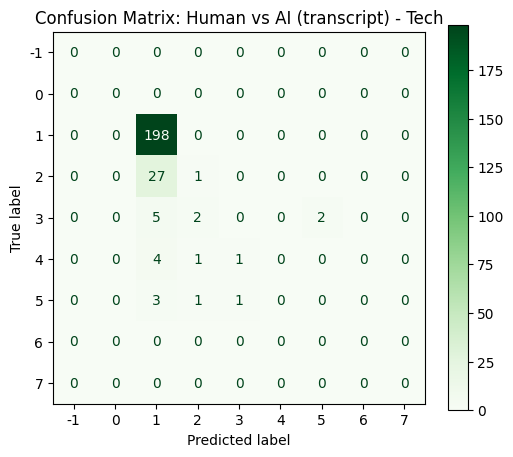

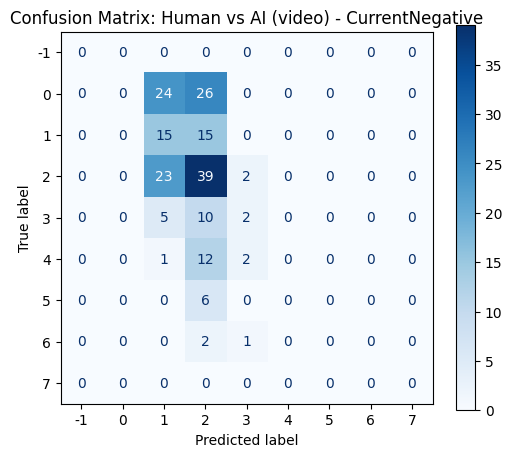

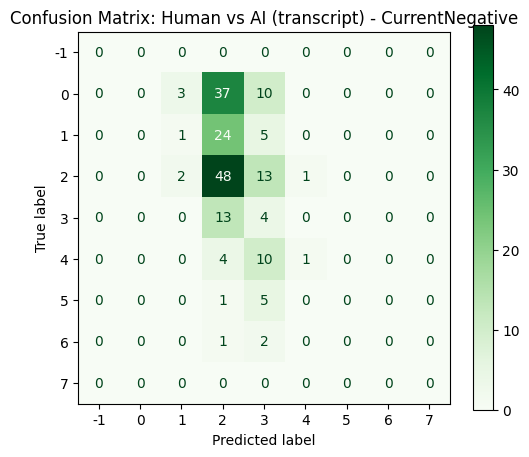

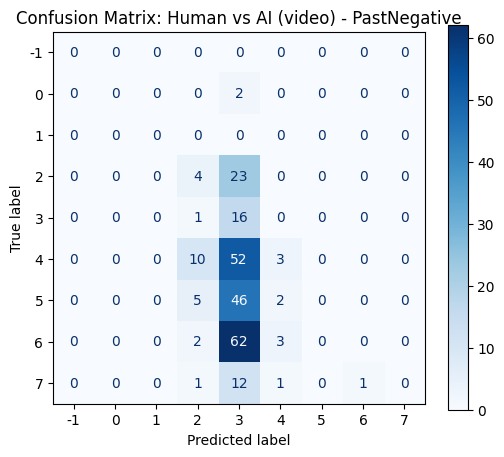

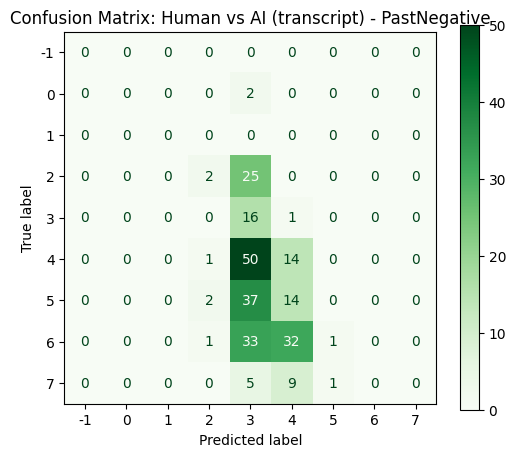

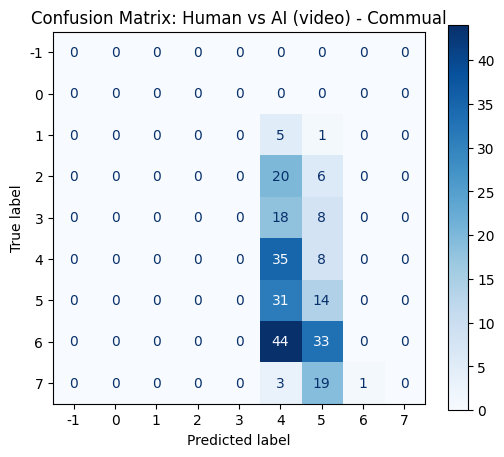

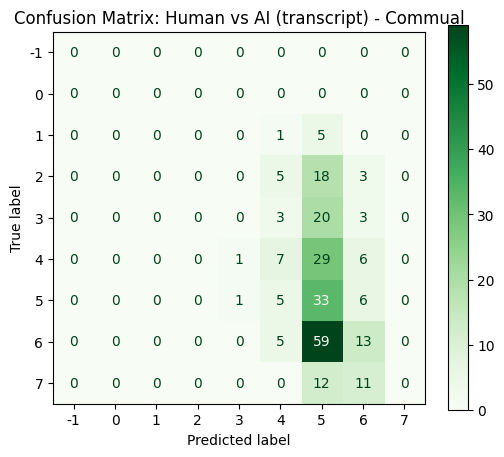

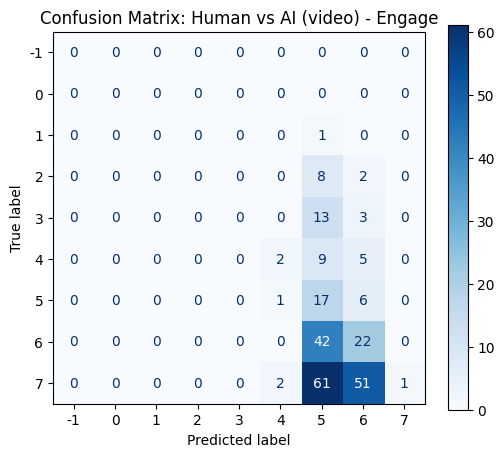

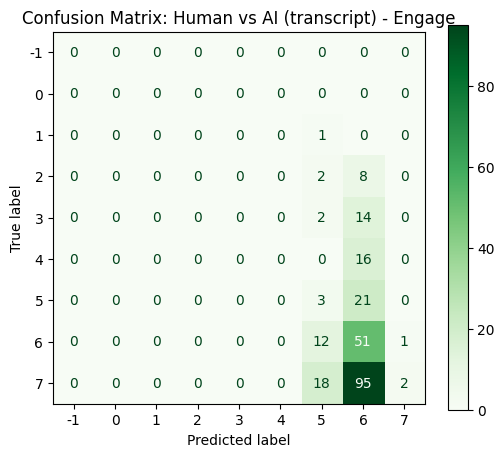

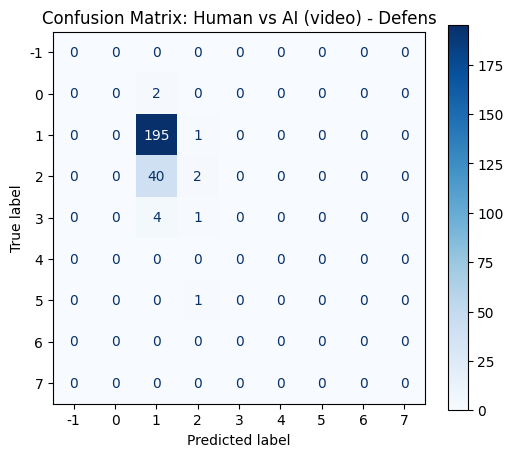

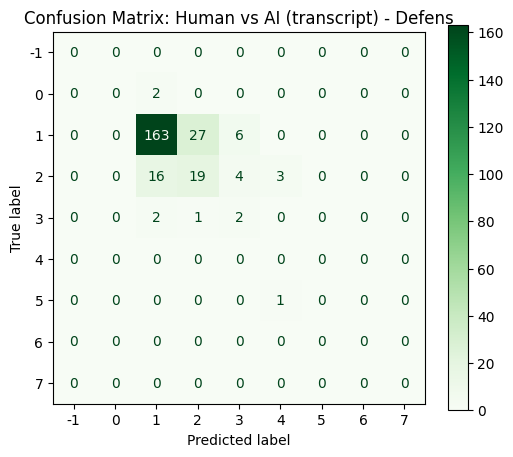

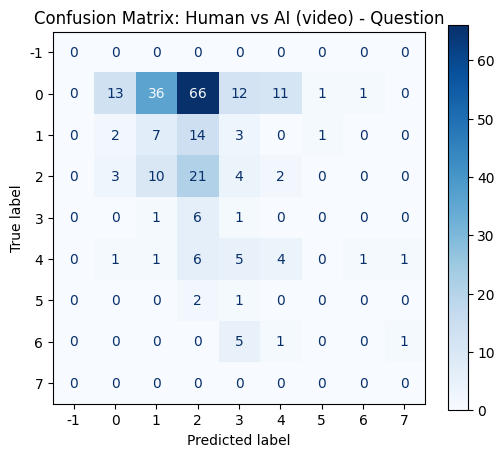

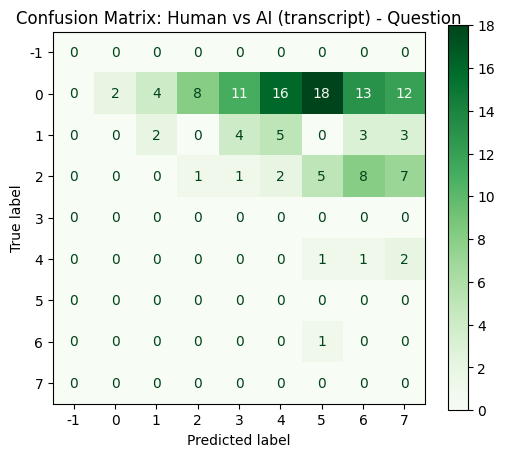

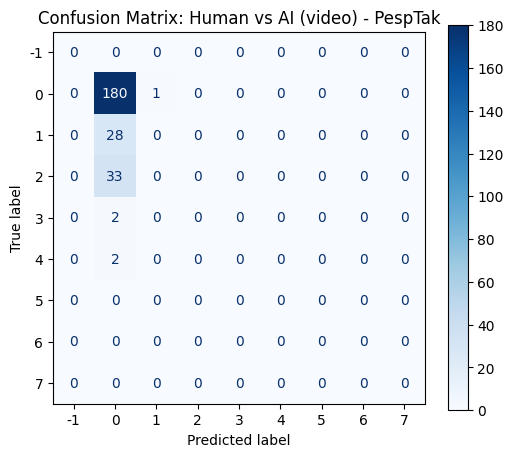

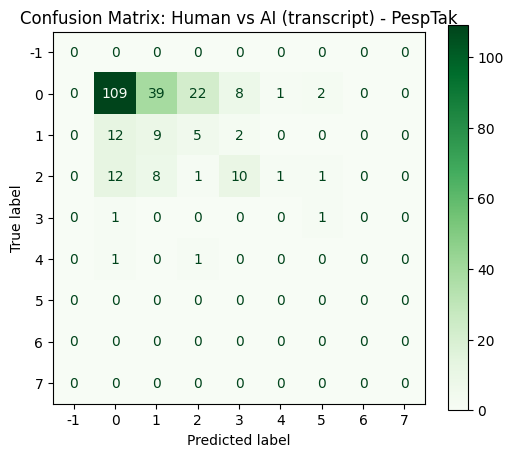

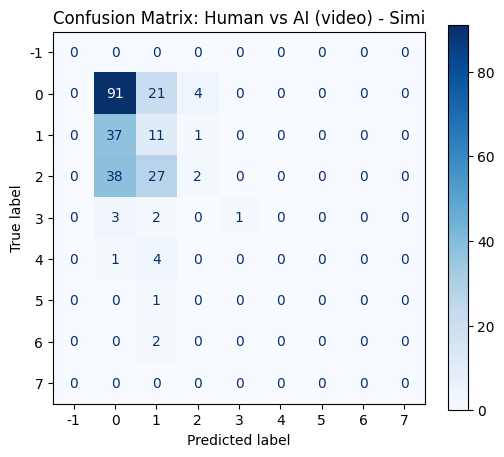

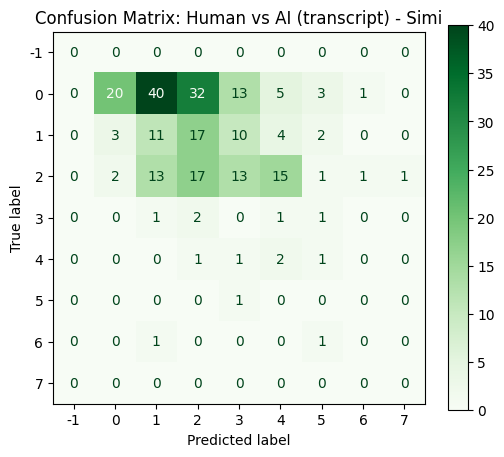

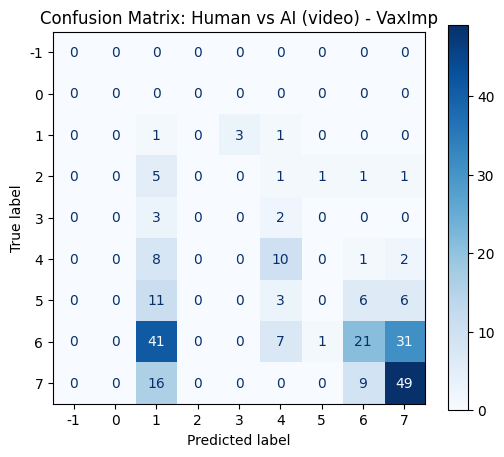

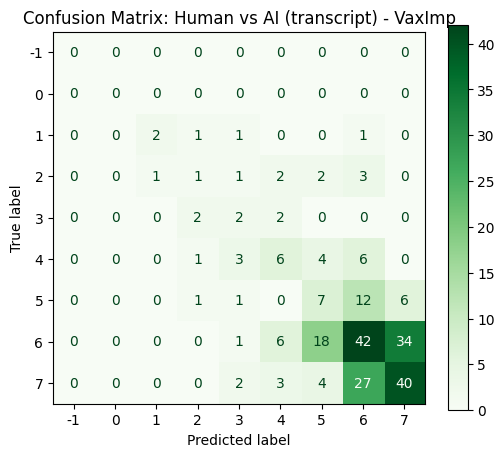

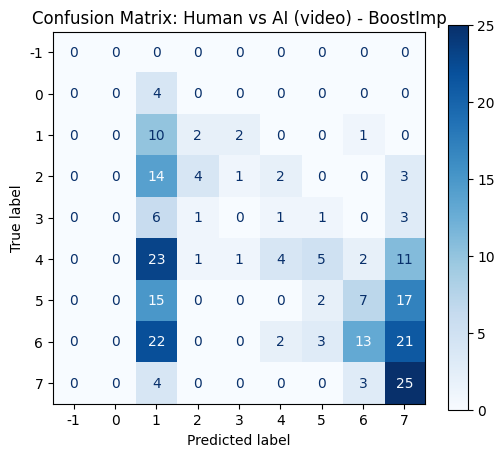

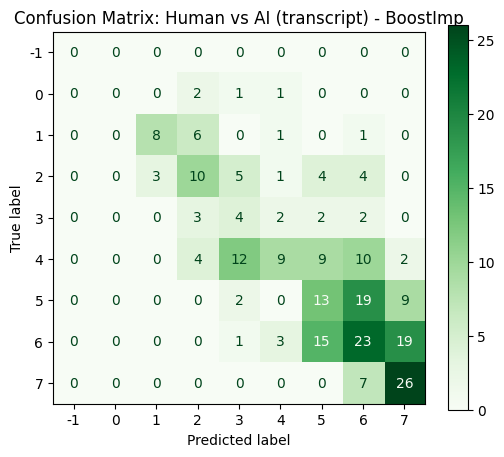

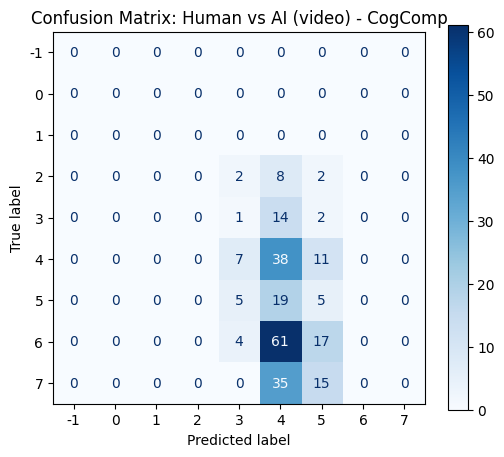

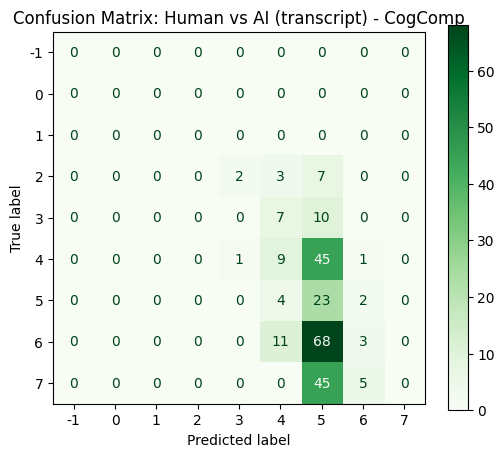

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

import matplotlib.pyplot as plt

categories = [col for col in hm_df_filtered.columns if col != 'id']
labels = list(range(-1, 8))  # Use the same label range as before

for category in categories:
    col_hm = f"{category}_hm"
    col_vd = f"{category}_aivd"
    col_ts = f"{category}_aitext"
    
    # Drop NaNs and filter out -1s for both comparisons
    mask_vd = (~vtt_merged_df[col_hm].isna()) & (~vtt_merged_df[col_vd].isna())
    y_true_vd = vtt_merged_df.loc[mask_vd, col_hm].round().astype(int)
    y_pred_vd = vtt_merged_df.loc[mask_vd, col_vd].round().astype(int)
    valid_idx_vd = (y_true_vd != -1) & (y_pred_vd != -1)
    y_true_vd = y_true_vd[valid_idx_vd]
    y_pred_vd = y_pred_vd[valid_idx_vd]
    
    mask_ts = (~vtt_merged_df[col_hm].isna()) & (~vtt_merged_df[col_ts].isna())
    y_true_ts = vtt_merged_df.loc[mask_ts, col_hm].round().astype(int)
    y_pred_ts = vtt_merged_df.loc[mask_ts, col_ts].round().astype(int)
    valid_idx_ts = (y_true_ts != -1) & (y_pred_ts != -1)
    y_true_ts = y_true_ts[valid_idx_ts]
    y_pred_ts = y_pred_ts[valid_idx_ts]
    
    # Confusion matrix: Human vs AI (video)
    cm_vd = confusion_matrix(y_true_vd, y_pred_vd, labels=labels)
    disp_vd = ConfusionMatrixDisplay(confusion_matrix=cm_vd, display_labels=labels)
    fig, ax = plt.subplots(figsize=(6, 5))
    disp_vd.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(f'Confusion Matrix: Human vs AI (video) - {category}')
    plt.show()
    
    # Confusion matrix: Human vs AI (transcript)
    cm_ts = confusion_matrix(y_true_ts, y_pred_ts, labels=labels)
    disp_ts = ConfusionMatrixDisplay(confusion_matrix=cm_ts, display_labels=labels)
    fig, ax = plt.subplots(figsize=(6, 5))
    disp_ts.plot(ax=ax, cmap='Greens', values_format='d')
    ax.set_title(f'Confusion Matrix: Human vs AI (transcript) - {category}')
    plt.show()

In [ ]:
icc_hm_vd_scores = {}
icc_hm_ts_scores = {}
icc_vd_ts_scores = {}
icc_hm_avg_scores = {}
list_of_scores = [icc_hm_vd_scores, icc_hm_ts_scores, icc_vd_ts_scores, icc_hm_avg_scores]

categories = [col for col in hm_df_filtered.columns if col != 'id']
for category in categories:
    
    col_hm = f"{category}_hm"
    col_vd = f"{category}_aivd"
    col_ts = f"{category}_aitext"
    col_avg = f"{category}_avg_vd_txt"
    
    if col_hm in vtt_merged_df.columns and col_vd in vtt_merged_df.columns:
       
        coder_hm = vtt_merged_df[col_hm]
        coder_vd = vtt_merged_df[col_vd]
        coder_ts = vtt_merged_df[col_ts]
        coder_avg = vtt_merged_df[col_avg]
        
        df_hm_vd = pd.DataFrame({'coder1': coder_hm, 'coder2': coder_vd})
        df_hm_ts = pd.DataFrame({'coder1': coder_hm, 'coder2': coder_ts})
        df_vd_ts = pd.DataFrame({'coder1': coder_vd, 'coder2': coder_ts})
        df_hm_avg = pd.DataFrame({'coder1': coder_hm, 'coder2': coder_avg})

        list_of_dfs = [df_hm_vd, df_hm_ts, df_vd_ts, df_hm_avg]
        for i in range(len(list_of_dfs)):
            df = list_of_dfs[i]
            df = df[(df['coder1'] != -1) & (df['coder2'] != -1)]
            
            df_long = df.melt(var_name='rater', value_name='score', ignore_index=False).reset_index()
            icc = pg.intraclass_corr(data=df_long, targets='index', raters='rater', ratings='score', nan_policy='omit')
            
            scores = list_of_scores[i]
            scores[category] = icc['ICC'].values[1] if not icc.empty else float('nan')

In [71]:
# Create a DataFrame to display kappa scores and simple agreement scores
icc_scores_table = pd.DataFrame({
    'Category': icc_hm_vd_scores.keys(),
    
    'Human vs AI video': icc_hm_vd_scores.values(),
    'Human vs AI transcript': icc_hm_ts_scores.values(),
    'AI video vs AI transcript': icc_vd_ts_scores.values(),
    'Human vs AI Average': icc_hm_avg_scores.values()
})

# apply gradient to the cell backgrounds
styled_table = (icc_scores_table.round(3)).style.background_gradient(cmap='RdYlGn')

styled_table


,Category,Human vs AI video,Human vs AI transcript,AI video vs AI transcript,Human vs AI Average
0,Tech,0.172000,0.326000,0.386000,0.265000
1,CurrentNegative,0.241000,0.202000,0.177000,0.238000
2,PastNegative,0.042000,0.152000,0.199000,0.094000
3,Commual,0.158000,0.127000,0.178000,0.153000
4,Engage,0.094000,0.010000,0.088000,0.059000
5,Defens,0.175000,0.418000,0.141000,0.456000
6,Question,0.242000,0.081000,0.041000,0.146000
7,PespTak,-0.005000,0.236000,0.001000,0.256000
8,Simi,0.165000,0.077000,0.023000,0.169000
9,VaxImp,0.206000,0.599000,0.207000,0.428000


In [59]:
agg_hm_vd_scores = {}
agg_hm_ts_scores = {}
agg_vd_ts_scores = {}
list_of_scores = [agg_hm_vd_scores, agg_hm_ts_scores, agg_vd_ts_scores]
# Iterate through each category (column) in hm_df excluding 'id'
categories = [col for col in hm_df_filtered.columns if col != 'id']
for category in categories:
    # if f"{category}_hm" in merged_df.columns and f"{category}_new" in merged_df.columns:
    #     # Calculate Cohen's kappa score for the category
    #     kappa = cohen_kappa_score(merged_df[f"{category}_hm"], merged_df[f"{category}_new"])
    #     kappa_scores[category] = kappa
    
    col_hm = f"{category}_hm"
    col_vd = f"{category}_aivd"
    col_ts = f"{category}_aitext"
    
    if col_hm in vtt_merged_df.columns and col_vd in vtt_merged_df.columns:
       
        coder_hm = vtt_merged_df[col_hm]
        coder_vd = vtt_merged_df[col_vd]
        coder_ts = vtt_merged_df[col_ts]
        
        df_hm_vd = pd.DataFrame({'coder1': coder_hm, 'coder2': coder_vd})
        df_hm_ts = pd.DataFrame({'coder1': coder_hm, 'coder2': coder_ts})
        df_vd_ts = pd.DataFrame({'coder1': coder_vd, 'coder2': coder_ts})

        list_of_dfs = [df_hm_vd, df_hm_ts, df_vd_ts]
        for i in range(len(list_of_dfs)):
            df = list_of_dfs[i]
            df = df[(df['coder1'] != -1) & (df['coder2'] != -1)]
            df = df.dropna()
            # Drop NaNs
            y_true = df['coder1'].round().astype(int)
            y_pred = df['coder2'].round().astype(int)
            valid_pairs = [(a, b) for a, b in zip(y_true, y_pred) if a != -1 and b != -1]
            # Count total valid pairs
            n_total = len(valid_pairs)

            # Count agreements
            n_agree = sum(a == b for a, b in valid_pairs)

            # Calculate percent agreement
            percent_agreement = n_agree / n_total if n_total > 0 else float('nan')
            scores = list_of_scores[i]
            scores[category] = percent_agreement

In [60]:
# Create a DataFrame to display kappa scores and simple agreement scores
agg_scores_table = pd.DataFrame({
    'Category': agg_hm_vd_scores.keys(),
    
    'Human vs AI video': agg_hm_vd_scores.values(),
    'Human vs AI transcript': agg_hm_ts_scores.values(),
    'AI video vs AI transcript': agg_vd_ts_scores.values()
})

# apply gradient to the cell backgrounds
styled_table = (agg_scores_table.round(3)).style.background_gradient(cmap='RdYlGn')

styled_table

,Category,Human vs AI video,Human vs AI transcript,AI video vs AI transcript
0,Tech,0.805000,0.809000,0.960000
1,CurrentNegative,0.303000,0.292000,0.405000
2,PastNegative,0.093000,0.130000,0.623000
3,Commual,0.199000,0.215000,0.312000
4,Engage,0.171000,0.228000,0.453000
5,Defens,0.801000,0.748000,0.745000
6,Question,0.187000,0.024000,0.032000
7,PespTak,0.732000,0.484000,0.555000
8,Simi,0.427000,0.203000,0.162000
9,VaxImp,0.336000,0.408000,0.295000


In [ ]:
print(vtt_merged_df.loc[vtt_merged_df['id'] == '13306', [col for col in vtt_merged_df.columns if col.endswith('_hm')]])

   Tech_hm  CurrentNegative_hm  PastNegative_hm  Commual_hm  Engage_hm  \
7      1.0                 0.5              2.0         6.5        7.0   

   Defens_hm  Question_hm  PespTak_hm  Simi_hm  VaxImp_hm  BoostImp_hm  \
7        1.0          2.5         1.0      2.0        7.0          1.0   

   CogComp_hm  
7         6.0  


In [53]:
print(vtt_merged_df.loc[vtt_merged_df['id'] == '13306', [col for col in vtt_merged_df.columns if col.endswith('_aivd')]])

   Tech_aivd  CurrentNegative_aivd  PastNegative_aivd  Commual_aivd  \
7        1.0                   2.0                3.0           4.0   

   Engage_aivd  Defens_aivd  Question_aivd  PespTak_aivd  Simi_aivd  \
7          5.0          1.0            2.0           0.0        1.0   

   VaxImp_aivd  BoostImp_aivd  CogComp_aivd  
7          1.0            1.0           4.0  


In [54]:
print(vtt_merged_df.loc[vtt_merged_df['id'] == '13306', [col for col in vtt_merged_df.columns if col.endswith('_aitext')]])

   Tech_aitext  CurrentNegative_aitext  PastNegative_aitext  Commual_aitext  \
7          1.0                     3.0                  3.0             5.0   

   Engage_aitext  Defens_aitext  Question_aitext  PespTak_aitext  Simi_aitext  \
7            6.0            3.0              7.0             3.0          3.0   

   VaxImp_aitext  BoostImp_aitext  CogComp_aitext  
7            4.0              2.0             5.0  
